# Student Grade Exploratory Data Analysis Project

## Shaping and understanding the data we are working with

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('student-dataset.csv')
df.drop(columns=['latitude', 'longitude', 'portfolio.rating', 'coverletter.rating', 'refletter.rating', 'ethnic.group'], inplace=True)
df.drop(df.columns[0], axis=1).describe()

,age,english.grade,math.grade,sciences.grade,language.grade
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,21.964169,3.369707,3.414332,3.446580,4.396417
std,1.248013,0.538724,0.476839,0.509081,0.996474
min,19.000000,1.500000,2.100000,1.400000,1.000000
25%,21.000000,3.100000,3.100000,3.200000,4.000000
50%,22.000000,3.500000,3.500000,3.600000,5.000000
75%,23.000000,3.800000,3.800000,3.800000,5.000000
max,26.000000,4.000000,4.000000,4.000000,5.000000


There is a significantly larger standard deviation in the Language grade, indicating that students perform inconsitently as a whole.

Students are achieving the highest grades in their Language classes, followed by Science, then lastly Math and English.

In [69]:
df.head(3)

,id,name,nationality,city,gender,age,english.grade,math.grade,sciences.grade,language.grade
0,0,Kiana Lor,China,Suzhou,F,22,3.5,3.7,3.1,1.0
1,1,Joshua Lonaker,United States of America,Santa Clarita,M,22,2.9,3.2,3.6,5.0
2,2,Dakota Blanco,United States of America,Oakland,F,22,3.9,3.8,3.2,5.0


We are provided information on student nationality, gender, and age which will be useful when making predictions based on demographics.

## What are the top-performing nationalities for each subject?

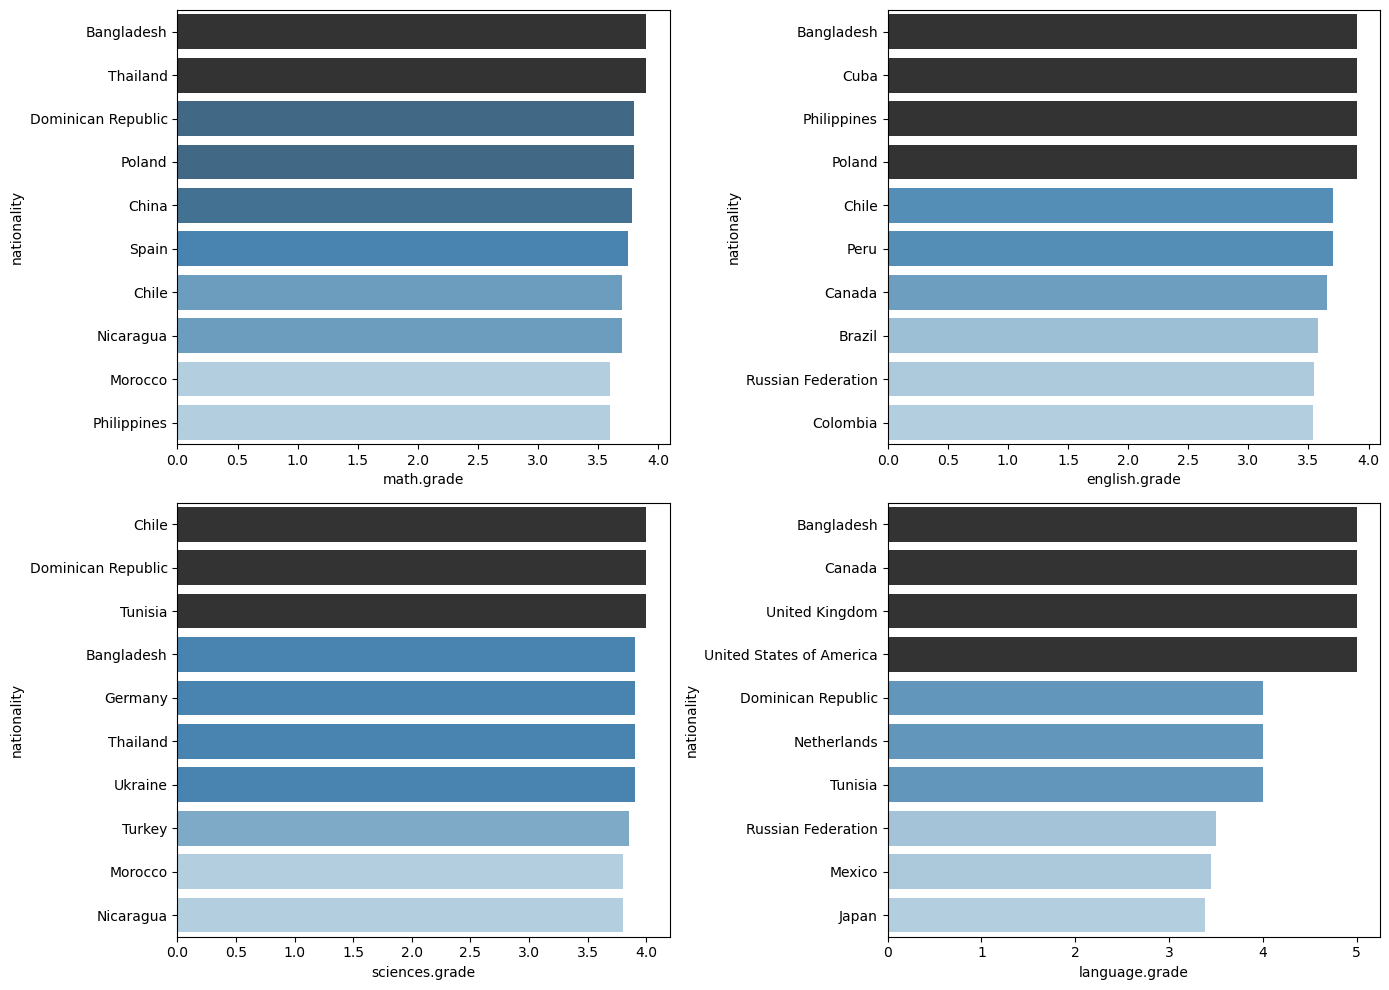

In [70]:
subjects = ['math.grade', 'english.grade', 'sciences.grade', 'language.grade']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
for i, subject in enumerate(subjects):
    ax = axes[i // 2, i % 2]
    top_10 = df.groupby('nationality')[subject].mean().nlargest(10).reset_index()
    sns.barplot(data=top_10, x=subject, y='nationality', hue=subject, legend=False, ax=ax, palette = 'Blues_d')
    plt.tight_layout()

People from Bangladesh were consistently the highest achievers in all subjects besides sciences.

## Which gender stacks up to having better grades for each subject?

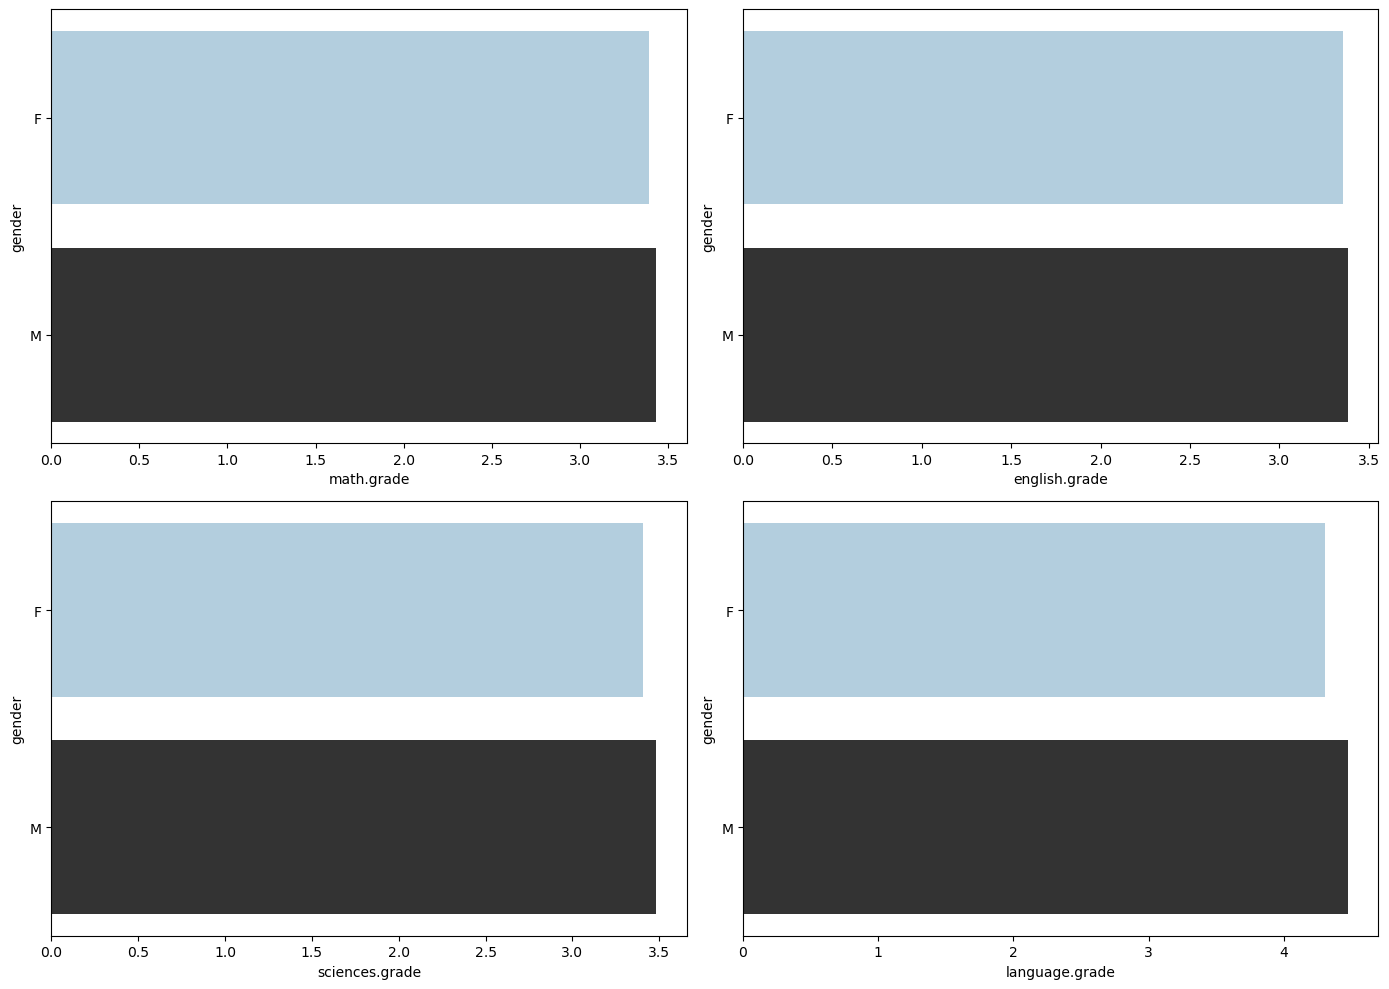

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10)) 
for i, subject in enumerate(subjects):
    ax = axes[i // 2, i % 2]
    filtered_df = df.query('gender != "other"')
    genders = filtered_df.groupby('gender')[subject].mean().reset_index()
    sns.barplot(data=genders, x=subject, y='gender', hue=subject, legend=False, ax=ax, palette = 'Blues_d')
    plt.tight_layout()

Interestingly, males outperformed females in all subjects.

## In which ages are we observing stronger grades?

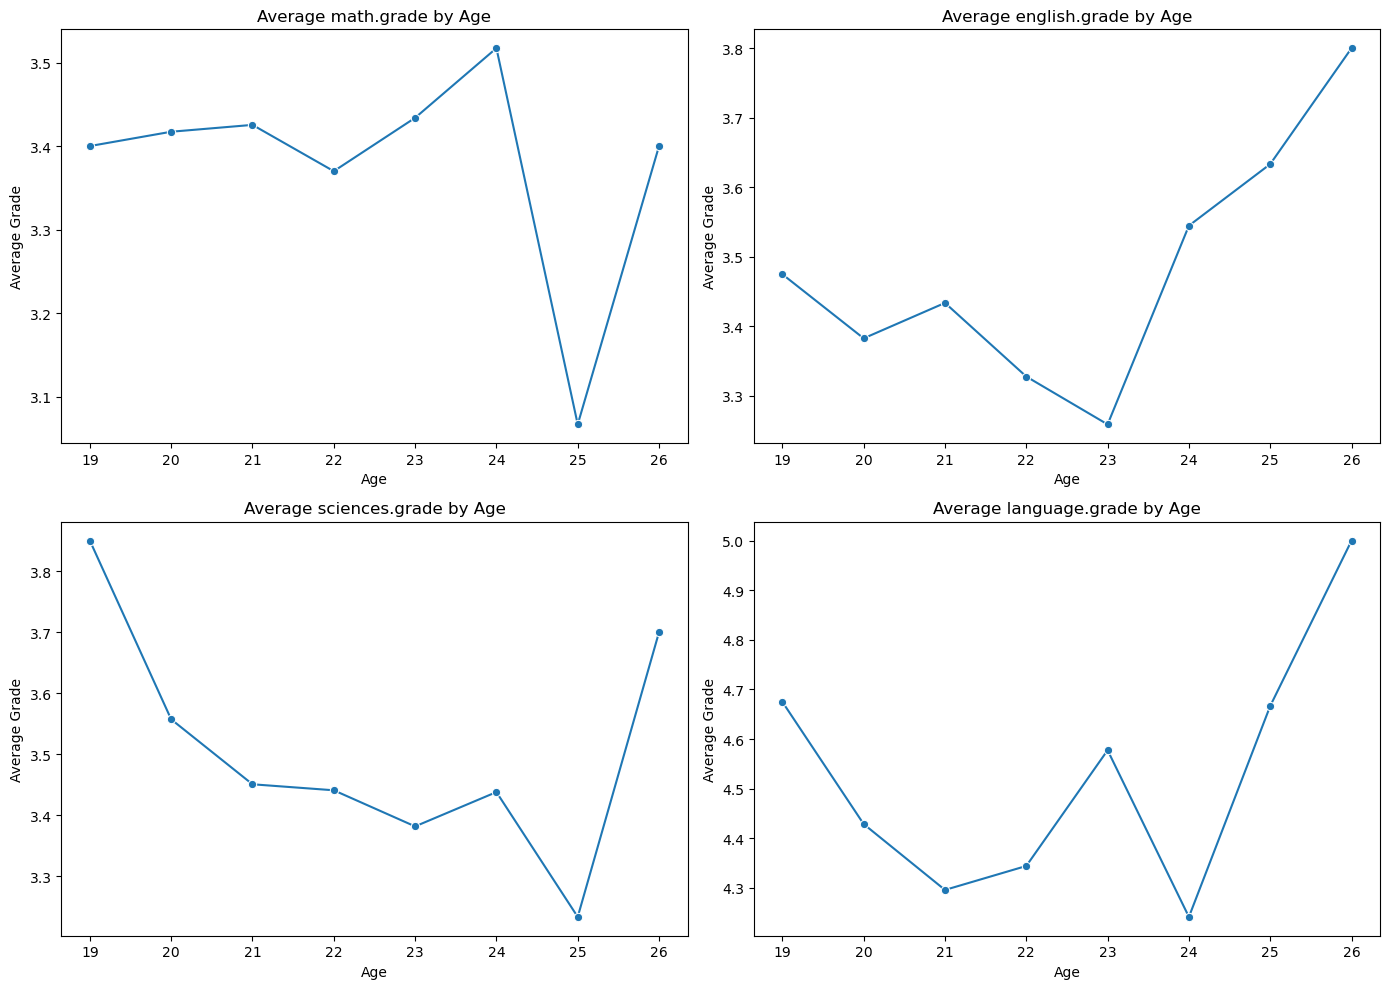

In [72]:
age_performance = df.groupby('age')[['math.grade', 'english.grade', 'sciences.grade', 'language.grade']].mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10)) 

for i, subject in enumerate(subjects):
    ax = axes[i // 2, i % 2] 
    
    sns.lineplot(x=age_performance.index, y=age_performance[subject], ax=ax, marker='o')

    ax.set_title(f'Average {subject} by Age')
    ax.set_xlabel('Age')
    ax.set_ylabel('Average Grade')

plt.tight_layout()
plt.show()

25 year olds proved to be the weakest age for both science and maths.
26 year olds were both the strongest in both english and languages. 
24 year olds were best at maths, and 19 year olds the best at science.
The analysis may not be entirely accurate, and runs the risk of being skewed as the distribution of ages in the data, as seen in section one, implies the majority of ages were clustered towards the 20-24 years old range. There were a limited number of 19 and 26 year old students, hence further investigation would be needed to confirm any trends for certain. 

## What are the cities with the worst language grades?
An important question to ask since there the largest standard deviation was observed in the language subject.

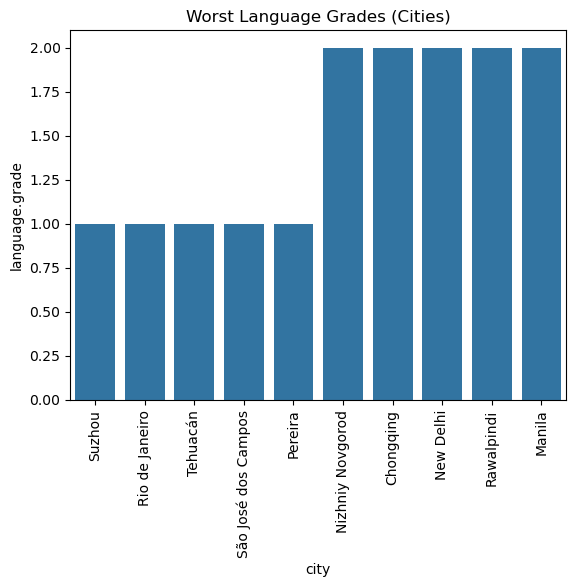

In [73]:
language_grades_city = df.groupby('city')['language.grade'].mean().reset_index().sort_values(by='language.grade', ascending = True).head(10)
ax = sns.barplot(x='city', y='language.grade',data = language_grades_city)
plt.title('Worst Language Grades (Cities)')
plt.xticks(rotation=90)
plt.show()

Asian and South American cities appear to be severly underperforming in languages, given both the median and maximum were 5.0.

When observing the top four nationalities for languages, notice three of them were in the Anglosphere (Canada, United States, and the UK) which could suggest native English speakers may be likely to perform higher in this subject.